### ***EJERCICIO 2*** **CABRERA HERNANDEZ NAOMI ITZEL**

**Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.** \

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |20%   | 25%  | 25%  | 20%  |10%   |


**La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.**




***a)Por simulacion* \
*b)Analiticamente* \
*c)Determine, por simulacion, el pedido de periodicos que optimiza el beneficio***

## SOLUCION

***a)Por simulacion: Construimos el modelo en varios pasos***

**PASO 1**. Defina las variables que intervienen en el modelo.

$X_1$ periodicos vendidos

**PASO 2**. Formule la distribución de probabilidad de cada variable.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |
|F(x)       |0.20  | 0.45 | 0.70 | 0.90 |1.00  |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|Periodicos |**30**|**40**|**50**|**60**|**70**|
|-----------|------|------|------|------|------|
|   f(x)    |0.20  | 0.25 | 0.25 | 0.20 |0.10  |
|F(x)       |0.20  | 0.45 | 0.70 | 0.90 |1.00  |
|Intervalos |0.00 a 0.19|0.20 a 0.44|0.45 a 0.69|0.70 a 0.89|0.90 a 1.00|

**PASO 5**. Genere números aleatorios.

x=rd.random()

**PASO 6**. Simule un lanzamiento.

|**Dia** |**Numero aleatorio**|**Ventas simuladas**|**Ventas reales**|**Ventas pedidos**|**Periodicos no vendidos**|**Beneficios (euros)**|**Beeneficio promedio**|
|-----------|------|------|------|------|------|------|------|
| 1    |0.25 |40 | 40| 0 |10  | -2|-2|
|2|0.75|60|50|10|0|8|6

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [11]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def ventas_sim():
  VS=0
  x=rd.random()

  if x>=0 and x<0.20:
    VS=30
  elif x>=0.20 and x<0.45:
    VS=40
  elif x>=0.45 and x< 0.70:
    VS=50
  elif x>=0.70 and x<0.90:
    VS=60
  elif x>=0.90 and x<=1.00:
    VS=70
  return VS

def beneficio(pedido):
 B=0
 VR=0
 VP=0
 NP=0
 vs=ventas_sim()
 if vs > pedido:
  VR=pedido
  VP=vs-pedido
  NP=0
 else:
  VR=vs
  VP=0
  NP=pedido-VR

 B=1.10*VR- 0.90*pedido - 0.10*NP - 0.20*VP
 return (B)   

In [13]:
beneficio(50)

-14.0

In [14]:
def simulacion(n):
  L=[]
  B=0
  for i in range(n):
    B+=beneficio(50)
    L.append(B/(i+1))
  return L

In [15]:
X=simulacion(1400)

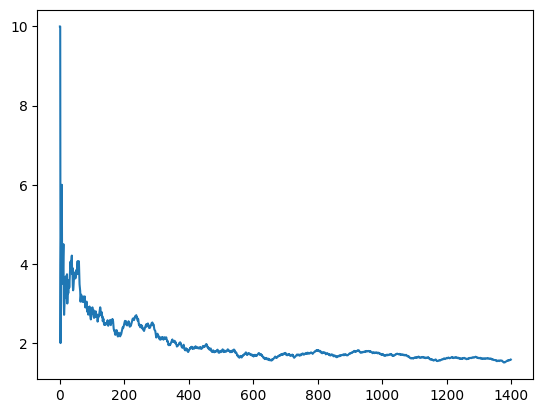

In [16]:
plt.plot(X)

In [17]:
np.mean(X)

1.9657570258342028

**PASO 8**. Replique el modelo

In [18]:
def modelo(n):
  lista=[]
  for i in range(n):
    s=simulacion(500)
    lista.append(np.mean(s))
  return lista

In [19]:
Y=modelo(40)

**PASO 9**. Calcule la probabilidad su desviación estándar.

In [20]:
print(np.mean(Y), np.std(Y))

1.4931958123696902 0.4817795841828244


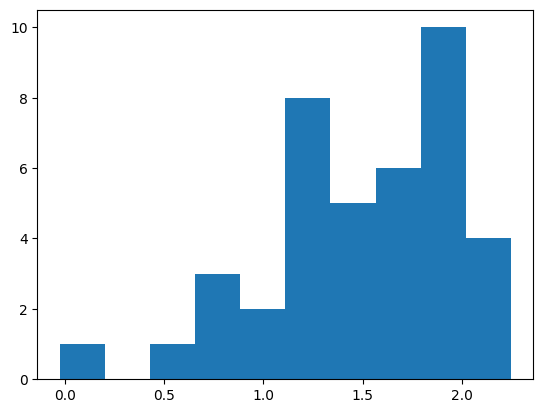

In [21]:
plt.hist(Y)
plt.show()

**PASO 10**. Halle el intervalo de confianza de la probabilidad con un nivel de confianza del $95 \%$


$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [22]:
np.mean(Y)

1.4931958123696902

In [23]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(1.3596533248526295, 1.626738299886751)

***b)Analiticamente***

Si se compran 50 periodicos el costo por ellos seria de 45 y al venderlos en 1.10 tenemos 55 por lo cual tenemos una ganancia de 10 ahora sacaremos las ventas perdidas y el de reciclaje

Calculamos los vendidos cada dia

$-30 periodicos=20*0.20=4$

$-40 periodicos =10*0.20=2$ 

$-50 periodicos =0$ 

$-60 periodicos =10*0.10=1$  


$-70 periodicos =20*0.10=2$ 

10-4-2-1-2

Por lo que el beneficio promedio es de 1 euro

***c)Determine, por simulacion, el pedido de periodicos que optimiza el beneficio***

In [5]:
def bene(numpedido):
  IN=numpedido*1.10
  CP=numpedido*0.90
  PNV=max(0,numpedido -50)
  CVP=PNV*0.20
  CR=PNV*0.10
  BEN=IN-CP-CVP-CR
  return BEN
MP=0
MB=0
for numpedido in range (30,70):
  BEN= bene(numpedido)
  if BEN>MB:
    MB=BEN
    MP=numpedido


In [10]:
print("El pedido optico es",MP,"con un beneficio","{:.2f}".format(MB)) 

El pedido optico es 50 con un beneficio 10.00
